In [1]:
import requests
import pandas as pd
from lxml import html
import numpy as np
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)
sns.set(rc={'figure.figsize' : (25, 15)})

## Data Collection part 1: 
#### using wikipedia of neighborhoods of Washigton DC

In [3]:
url = "https://en.wikipedia.org/wiki/Neighborhoods_in_Washington,_D.C."
page = requests.get(url)
print(page.text[:500])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Neighborhoods in Washington, D.C. - Wikipedia</title>
<script>document.documentElement.className=document.documentElement.className.replace(/(^|\s)client-nojs(\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Neighborhoods_in_Washington,_D.C.","wgTitle":"Neighborhoods in Washington, D.C.","wgCurRevisionId":899568075,"wgRe


In [4]:
webpage = html.fromstring(page.content)
lst = webpage.xpath('//li/a/@href')
print(lst[0:15])
#lst

['#List_of_neighborhoods_by_ward', '#Ward_1', '#Ward_2', '#Ward_3', '#Ward_4', '#Ward_5', '#Ward_6', '#Ward_7', '#Ward_8', '#References', '#External_links', '/wiki/Adams_Morgan', '/wiki/Columbia_Heights_(Washington,_D.C.)', '/wiki/Howard_University', '/wiki/Kalorama,_Washington,_D.C.']


In [5]:
lst=lst[11:lst.index('/wiki/Woodland,_Washington,_D.C.')+1]
lst[:10]

['/wiki/Adams_Morgan',
 '/wiki/Columbia_Heights_(Washington,_D.C.)',
 '/wiki/Howard_University',
 '/wiki/Kalorama,_Washington,_D.C.',
 '/wiki/LeDroit_Park,_Washington,_D.C.',
 '/wiki/Mount_Pleasant,_Washington,_D.C.',
 '/wiki/Park_View,_Washington,_D.C.',
 '/wiki/Pleasant_Plains,_Washington,_D.C.',
 '/wiki/Shaw,_Washington,_D.C.',
 '/wiki/U_Street']

In [6]:
names = []
long = []
latt = []

for url in lst:
    full_url = 'https://en.wikipedia.org/' + url
    page = requests.get(full_url)
    webpage = html.fromstring(page.content)
    name = webpage.xpath('//title')[0].text
    name = name[:name.index(' - Wikipedia')]
    if name.find('(Washington, D.C.)') > 0:
        name = name[:name.index('(Washington, D.C.)')]
    coords = webpage.xpath('//span[@class="geo"]')
    if len(coords): 
        coords = coords[0].text
        latt.append(float(coords[:coords.index(';')]))
        long.append(float(coords[coords.index(';')+2:]))
        names.append(name)
print(names, latt, long)

['Adams Morgan', 'Columbia Heights ', 'Howard University', 'Kalorama ', 'LeDroit Park', 'Mount Pleasant ', 'Park View ', 'Pleasant Plains ', 'Shaw ', 'U Street', 'Burleith', 'Chinatown ', 'Downtown ', 'Dupont Circle', 'Federal Triangle', 'Foggy Bottom', 'Georgetown ', 'Logan Circle ', 'Mount Vernon Square', 'Penn Quarter', 'Shaw ', 'Kalorama ', 'Southwest Federal Center', 'U Street', 'West End ', 'American University Park', 'Berkley ', 'Cathedral Heights', 'Chevy Chase ', 'Cleveland Park', 'Colony Hill', 'Forest Hills ', 'Foxhall ', 'Friendship Heights', 'Glover Park', 'Kent ', 'Massachusetts Heights', 'McLean Gardens', 'North Cleveland Park', 'Observatory Circle ', 'The Palisades ', 'Potomac Heights ', 'Spring Valley ', 'Tenleytown', 'Wakefield ', 'Wesley Heights', 'Woodland Normanstone', 'Woodley Park ', 'Barnaby Woods', 'Brightwood ', 'Brightwood Park', 'Chevy Chase ', 'Colonial Village', 'Crestwood ', 'Fort Totten ', 'Hawthorne ', 'Manor Park ', 'Petworth ', 'Riggs Park', 'Shepherd

In [8]:
districts_coords = pd.DataFrame({"Neighborhood" : names, "Latitude" : latt, "Longitude" : long})
print(districts_coords.head())
districts_coords.shape

        Neighborhood   Latitude  Longitude
0       Adams Morgan  38.922610 -77.042661
1  Columbia Heights   38.925000 -77.030000
2  Howard University  38.922220 -77.019440
3          Kalorama   38.918400 -77.048000
4       LeDroit Park  38.919052 -77.017035


(135, 3)

In [9]:
!conda install -c conda-forge folium=0.5.0 
import folium # map rendering library
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
print('Libraries imported.')

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::anaconda==5.3.1=py37_0
  - defaults/linux-64::astropy==3.0.4=py37h14c3975_0
  - defaults/linux-64::bkcharts==0.2=py37_0
  - defaults/linux-64::blaze==0.11.3=py37_0
  - defaults/linux-64::bokeh==0.13.0=py37_0
  - defaults/linux-64::bottleneck==1.2.1=py37h035aef0_1
  - defaults/linux-64::dask==0.19.1=py37_0
  - defaults/linux-64::datashape==0.5.4=py37_1
  - defaults/linux-64::mkl-service==1.1.2=py37h90e4bf4_5
  - defaults/linux-64::numba==0.39.0=py37h04863e7_0
  - defaults/linux-64::numexpr==2.6.8=py37hd89afb7_0
  - defaults/linux-64::odo==0.5.1=py37_0
  - defaults/linux-64::pytables==3.4.4=py37ha205bf6_0
  - defaults/linux-64::pytest-arraydiff==0.2=py37h39e3cac_0
  - defaults/linux-64::pytest-astropy==0.4.0=py37_0
  - defaults/linux-64::pytest-doctestplus==0.1.3=py37_0
  - defaults/linux-64::pywavelets==1.0.0=py37h

In [10]:
districts_cords=districts_coords.groupby('Neighborhood', as_index =False).mean()
districts_cords.shape
districts_cords

,Neighborhood,Latitude,Longitude
0,Adams Morgan,38.922610,-77.042661
1,American University Park,38.950000,-77.090000
2,Arboretum,38.914211,-76.973089
3,Barnaby Woods,38.974400,-77.059700
4,Barney Circle,38.878500,-76.980700
5,Barry Farm,38.859300,-76.999100
6,Bellevue,38.827595,-77.009175
7,Benning,38.895000,-76.949200
8,Benning Heights,38.881700,-76.936100
9,Benning Ridge,38.882400,-76.938300


In [11]:
address = 'Washington, D.C.'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
Washington_latitude = location.latitude
Washington_longitude = location.longitude
print('The geograpical coordinate of Washington are {}, {}.'.format(Washington_latitude, Washington_longitude))

map_Washington = folium.Map(location=[Washington_latitude, Washington_longitude], zoom_start=12)
map_Washington

The geograpical coordinate of Washington are 38.8950092, -77.0365625.


In [13]:
# add markers to map
for lat, lng, neighborhood in zip(districts_coords['Latitude'], districts_cords['Longitude'], districts_cords['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Washington)

In [14]:
map_Washington


In [17]:
districts_coords.to_csv("Washington_DC_neighbourhood.csv")

In [36]:
CLIENT_ID = 'FZ4KWZRD2ENR0BNREC1OYUPIOGWHUGPEKYSRFTY1WTG4T0AC' # your Foursquare ID
CLIENT_SECRET = 'QXVML4C1VCLZPETGQVE3DMO3SLZ13VSJ40VGZ00LHX2YU5DB' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

CLIENT_ID: FZ4KWZRD2ENR0BNREC1OYUPIOGWHUGPEKYSRFTY1WTG4T0AC
CLIENT_SECRET:QXVML4C1VCLZPETGQVE3DMO3SLZ13VSJ40VGZ00LHX2YU5DB


## Data collection part 2:
#### Collecting from foursquare.com

In [37]:
# create a function to repeat the same process to all the neighborhoods in Toronto
def getNearbyhomes(names, latt, long, radius=500, LIMIT=100):
    from pandas.io.json import json_normalize
    venues_list=[]
    categoryId = '4d954b06a243a5684965b473'
    for name, lat, lng in zip(names, latt, long):
        print(name)
            
        # create the API request URL
        url1 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
             CLIENT_ID, 
             CLIENT_SECRET, 
             VERSION, 
             lat, 
             lng, 
             radius, 
             LIMIT,
             categoryId)
            
        # make the GET request
        results = requests.get(url1).json()["response"]['groups'][0]['items']
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['id']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues) 

In [38]:
Washington_homes = getNearbyhomes(names=districts_cords["Neighborhood"],
                                   latt=districts_cords["Latitude"],
                                   long=districts_cords["Longitude"]
                                  )

Adams Morgan
American University Park
Arboretum 
Barnaby Woods
Barney Circle
Barry Farm
Bellevue 
Benning 
Benning Heights
Benning Ridge
Berkley 
Bloomingdale 
Brentwood 
Brightwood 
Brightwood Park
Brookland 
Buena Vista 
Burleith
Burrville 
Capitol Hill
Capitol View 
Carver Langston
Cathedral Heights
Central Northeast
Chevy Chase 
Chinatown 
Civic Betterment
Cleveland Park
Colonial Village
Colony Hill
Columbia Heights 
Congress Heights
Crestwood 
Deanwood
Douglass 
Downtown 
Dupont Circle
Dupont Park
East River Heights 
Eastland Gardens
Eckington 
Edgewood 
Fairfax Village
Fairlawn 
Federal Triangle
Foggy Bottom
Forest Hills 
Fort Davis 
Fort Dupont
Fort Totten 
Foxhall 
Friendship Heights
Garfield Heights 
Gateway 
Georgetown 
Glover Park
Good Hope 
Greenway 
Hawthorne 
Hillbrook 
Hillcrest 
Howard University
Ivy City
Judiciary Square
Kalorama 
Kenilworth 
Kent 
Kingman Park
Knox Hill
Langdon 
LeDroit Park
Lincoln Heights 
Logan Circle 
Manor Park 
Marshall Heights 
Massachusetts He

In [39]:
print(Washington_homes.shape)
Washington_homes.head()

(651, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adams Morgan,38.92261,-77.042661,1841 Columbia Road,38.921341,-77.043792,5022c626e0e28d7a1c66ef31
1,Adams Morgan,38.92261,-77.042661,Kalorama Park,38.922157,-77.042946,58cc2bfbfa7ed0738e14f3f9
2,Adams Morgan,38.92261,-77.042661,Orlovon Condominium (UIP Properties),38.922049,-77.041262,5022c335e0e28d7a1c669e08
3,Adams Morgan,38.92261,-77.042661,Cortland,38.922963,-77.041108,4e1a80d4c65b6bfb592290d4
4,Adams Morgan,38.92261,-77.042661,Melwood,38.922466,-77.043389,51db3fc0498e2860a8f238b2


In [21]:
# create a function to repeat the same process to all the neighborhoods in Toronto
def getNearbyres(names, latt, long, radius=1800, LIMIT=200):
    from pandas.io.json import json_normalize
    venues_list=[]
    categoryId2 = '4bf58dd8d48988d10f941735'
    for name, lat, lng in zip(names, latt, long):
        print(name)
            
        # create the API request URL
        url2='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
             CLIENT_ID, 
             CLIENT_SECRET, 
             VERSION, 
             lat, 
             lng, 
             radius, 
             LIMIT,
             categoryId2)
            
        # make the GET request
        results = requests.get(url2).json()["response"]['groups'][0]['items']
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['id']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
Washington_res = getNearbyres(names=districts_cords["Neighborhood"],
                                   latt=districts_cords["Latitude"],
                                   long=districts_cords["Longitude"]
                                  )

Adams Morgan
American University Park
Arboretum 
Barnaby Woods
Barney Circle
Barry Farm
Bellevue 
Benning 
Benning Heights
Benning Ridge
Berkley 
Bloomingdale 
Brentwood 
Brightwood 
Brightwood Park
Brookland 
Buena Vista 
Burleith
Burrville 
Capitol Hill
Capitol View 
Carver Langston
Cathedral Heights
Central Northeast
Chevy Chase 
Chinatown 
Civic Betterment
Cleveland Park
Colonial Village
Colony Hill
Columbia Heights 
Congress Heights
Crestwood 
Deanwood
Douglass 
Downtown 
Dupont Circle
Dupont Park
East River Heights 
Eastland Gardens
Eckington 
Edgewood 
Fairfax Village
Fairlawn 
Federal Triangle
Foggy Bottom
Forest Hills 
Fort Davis 
Fort Dupont
Fort Totten 
Foxhall 
Friendship Heights
Garfield Heights 
Gateway 
Georgetown 
Glover Park
Good Hope 
Greenway 
Hawthorne 
Hillbrook 
Hillcrest 
Howard University
Ivy City
Judiciary Square
Kalorama 
Kenilworth 
Kent 
Kingman Park
Knox Hill
Langdon 
LeDroit Park
Lincoln Heights 
Logan Circle 
Manor Park 
Marshall Heights 
Massachusetts He

In [23]:
print(Washington_res.shape)
Washington_res.head()

(839, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adams Morgan,38.92261,-77.042661,Jyoti,38.921342,-77.042202,4add281cf964a5205b6421e3
1,Adams Morgan,38.92261,-77.042661,Bombay Street Food,38.930581,-77.033601,5bfdd579dab4b1002c462ad6
2,Adams Morgan,38.92261,-77.042661,Himalayan Heritage,38.919818,-77.041511,4ac0fd13f964a520509520e3
3,Adams Morgan,38.92261,-77.042661,Lemon Cuisine of India,38.909654,-77.047245,58338d8614fb414b1775bdc0
4,Adams Morgan,38.92261,-77.042661,Sacrificial Lamb,38.912466,-77.038771,4b43e967f964a520dfed25e3


In [24]:
Resturant_id_list = Washington_res['Venue Category'].tolist()
Resturant_id_list

['4add281cf964a5205b6421e3',
 '5bfdd579dab4b1002c462ad6',
 '4ac0fd13f964a520509520e3',
 '58338d8614fb414b1775bdc0',
 '4b43e967f964a520dfed25e3',
 '53c1dcdf498eb5bf28fbb769',
 '4f69ef48e4b074b7db82df76',
 '51b9fb6c5c8c6b4638498729',
 '4c110fdc3ce120a12e0c091c',
 '4ada8777f964a520482321e3',
 '53a4f29a498ea84d1e8504be',
 '50cbbb3f498e9af656348cb9',
 '4e4e60dcbd4101d0d7a8d4ef',
 '4b6b7cf0f964a520f70b2ce3',
 '4ab02d05f964a520556620e3',
 '40b3de00f964a52012001fe3',
 '5349bdc9498ef20282e11b4f',
 '4fe8dcca6d8673de7472e8c4',
 '57ad0d46498e56ab7821ff80',
 '4b78b8cdf964a52064df2ee3',
 '4aeb82d5f964a520dbc221e3',
 '51e9c6a1498ee47ea758777c',
 '5811f320d67cb2ee0beec5a9',
 '56044d86498eb2f1f4294fdf',
 '4e68d8cacc3f39dbbd1eded6',
 '4a907b43f964a520211820e3',
 '4e091cc1ae60a90eabd30273',
 '56cfc388cd102896ae6b3464',
 '512ec098e4b09a951ca42a0f',
 '5226643c7e48f5ecf8e3a77c',
 '4f69ef48e4b074b7db82df76',
 '4c8a5d069ef0224be41e5a7b',
 '510048c3e4b0a270005eb807',
 '4fe8dcca6d8673de7472e8c4',
 '5cf1b7d0d807

In [29]:
#set up to pull the likes from the API based on venue ID

url_list = []
like_list = []
json_list = []

for i in Resturant_id_list:
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    like_list.append(likes)
print(like_list)

[39, 13, 27, 13, 22, 6, 14, 20, 19, 33, 0, 0, 0, 0, 0, 525, 60, 335, 37, 14, 37, 0, 0, 0, 0, 4, 0, 1, 8, 163, 14, 8, 5, 335, 0, 15, 7, 5, 0, 15, 1, 1, 7, 12, 37, 8, 0, 0, 0, 0, 1, 461, 163, 7, 21, 14, 50, 65, 38, 18, 247, 253, 0, 20, 5, 634, 4, 4, 0, 1, 1, 1, 59, 37, 14, 4, 6, 6, 4, 461, 7, 14, 145, 18, 163, 50, 65, 16, 247, 20, 253, 4, 634, 1, 3, 3, 3, 0, 7, 5, 1, 0, 0, 4, 525, 60, 1, 63, 37, 4, 6, 6, 8, 4, 37, 15, 32, 0, 0, 8, 39, 13, 14, 22, 27, 8, 33, 1, 0, 0, 0, 0, 2, 525, 60, 335, 63, 13, 2, 0, 37, 145, 461, 362, 7, 32, 16, 14, 18, 13, 50, 65, 22, 6, 20, 247, 20, 3, 3, 33, 3, 4, 253, 7, 0, 0, 1, 525, 0, 634, 0, 60, 1, 335, 1, 362, 145, 32, 13, 39, 6, 16, 22, 20, 37, 27, 33, 19, 14, 0, 3, 0, 0, 3, 525, 0, 0, 0, 4, 7, 0, 3, 1, 0, 60, 0, 177, 163, 5, 0, 15, 7, 5, 15, 0, 0, 0, 461, 7, 145, 32, 14, 50, 65, 18, 16, 247, 253, 20, 3, 1, 634, 4, 4, 0, 3, 3, 5, 7, 0, 0, 0, 0, 1, 1, 362, 32, 145, 13, 37, 6, 16, 22, 12, 20, 14, 33, 3, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 7, 3, 525, 177, 63, 6, 4, 1

In [30]:
print(len(like_list))

print(len(Resturant_id_list))

839
839


In [31]:
Washington_res['Resturent_Likes'] = like_list
Washington_res.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Resturent_Likes
0,Adams Morgan,38.92261,-77.042661,Jyoti,38.921342,-77.042202,4add281cf964a5205b6421e3,39
1,Adams Morgan,38.92261,-77.042661,Bombay Street Food,38.930581,-77.033601,5bfdd579dab4b1002c462ad6,13
2,Adams Morgan,38.92261,-77.042661,Himalayan Heritage,38.919818,-77.041511,4ac0fd13f964a520509520e3,27
3,Adams Morgan,38.92261,-77.042661,Lemon Cuisine of India,38.909654,-77.047245,58338d8614fb414b1775bdc0,13
4,Adams Morgan,38.92261,-77.042661,Sacrificial Lamb,38.912466,-77.038771,4b43e967f964a520dfed25e3,22


In [32]:
Washington_resturentss= Washington_res.drop(columns=['Venue Latitude','Venue Longitude'])
Washington_resturentss.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category,Resturent_Likes
0,Adams Morgan,38.92261,-77.042661,Jyoti,4add281cf964a5205b6421e3,39
1,Adams Morgan,38.92261,-77.042661,Bombay Street Food,5bfdd579dab4b1002c462ad6,13
2,Adams Morgan,38.92261,-77.042661,Himalayan Heritage,4ac0fd13f964a520509520e3,27
3,Adams Morgan,38.92261,-77.042661,Lemon Cuisine of India,58338d8614fb414b1775bdc0,13
4,Adams Morgan,38.92261,-77.042661,Sacrificial Lamb,4b43e967f964a520dfed25e3,22


In [33]:
Washington_residential_group = Washington_resturentss.groupby('Neighborhood' , as_index =False).mean()
print(Washington_residential_group.shape)
Washington_residential_group.head()

(77, 4)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Resturent_Likes
0,Adams Morgan,38.922610,-77.042661,61.210526
1,American University Park,38.950000,-77.090000,17.000000
2,Barney Circle,38.878500,-76.980700,1.000000
3,Barry Farm,38.859300,-76.999100,0.500000
4,Berkley,38.912056,-77.088250,8.000000


In [40]:
home_id_list = Washington_homes['Venue Category'].tolist()
home_id_list

['5022c626e0e28d7a1c66ef31',
 '58cc2bfbfa7ed0738e14f3f9',
 '5022c335e0e28d7a1c669e08',
 '4e1a80d4c65b6bfb592290d4',
 '51db3fc0498e2860a8f238b2',
 '4d3de8a55f5488bf3ecf46e6',
 '5022ccc6e0e28d7a1c67a84a',
 '4b5b4465f964a520d7ef28e3',
 '4bef4d7f5e4aa59313e158bb',
 '4fb3e93ae4b000a78a61c950',
 '5022bc37e0e28d7a1c65cc04',
 '5582f6b4498e9f63b6fdf45a',
 '4d3de8df5f5488bf54cf46e6',
 '4bc50f616cccd13a8cb7ff8b',
 '54f6ac1d498e859ac211ec03',
 '4e2369f91f6effe84f85b9a9',
 '57600a1e498ef29d8e1c2af9',
 '590f54eb95a7223da47dac18',
 '5022c85be0e28d7a1c672cb2',
 '4adb872bf964a520aa2821e3',
 '505565e7e4b0ed8a08960ed9',
 '56aed085498e73225e731cd5',
 '5022a7bfe0e28d7a1c637bc4',
 '501352e5e4b07ac9f17a20e1',
 '4beedd34e8c3c928da449992',
 '4de1584c8877bcb68629f7c5',
 '51948e267dd2fea34fa6eaf7',
 '521cdd608bfd431d33e8311d',
 '4baeaf55f964a520a3ce3be3',
 '4dea74a022713dd9739402e3',
 '57f2ca59498ed2bcffce81d0',
 '518c1e19498e871aa77400d6',
 '521cdd608bfd431d33e82fb2',
 '4ff374f5e4b024f558631d26',
 '4ba78488f964

In [41]:
url_list1 = []
like_list1 = []
json_list1 = []

for i in home_id_list:
    venue_url2 = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list1.append(venue_url2)
for link in url_list1:
    result = requests.get(link).json()
    likes2 = result['response']['likes']['count']
    like_list1.append(likes2)
print(like_list1)

[1, 0, 3, 1, 0, 0, 1, 0, 1, 2, 3, 0, 0, 0, 0, 4, 0, 0, 1, 5, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 3, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 20, 0, 2, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 15, 0, 2, 0, 1, 0, 0, 7, 0, 0, 6, 1, 9, 0, 2, 0, 0, 1, 4, 2, 4, 0, 3, 4, 0, 0, 3, 0, 2, 9, 2, 0, 1, 0, 1, 1, 8, 0, 1, 0, 0, 1, 0, 0, 0, 0, 7, 1, 1, 7, 3, 3, 2, 1, 1, 4, 1, 8, 0, 1, 0, 3, 4, 2, 1, 1, 1, 1, 2, 1, 2, 0, 1, 6, 0, 0, 0, 3, 2, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 0, 1, 1, 11, 13, 1, 0, 1, 2, 0, 2, 1, 0, 8, 0, 4, 1, 5, 2, 0, 2, 8, 6, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 3, 6, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 3, 1, 0, 3, 4, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 3, 0, 1, 2, 0, 2, 1, 2, 1, 0, 0, 0, 3, 1, 0, 8, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 2, 8, 6, 0, 5,

In [73]:
print(len(like_list1))
print(len(home_id_list))

651
651


In [43]:
Washington_homes['Popularirt_of_home'] = like_list1
Washington_homes.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Popularirt_of_home
0,Adams Morgan,38.92261,-77.042661,1841 Columbia Road,38.921341,-77.043792,5022c626e0e28d7a1c66ef31,1
1,Adams Morgan,38.92261,-77.042661,Kalorama Park,38.922157,-77.042946,58cc2bfbfa7ed0738e14f3f9,0
2,Adams Morgan,38.92261,-77.042661,Orlovon Condominium (UIP Properties),38.922049,-77.041262,5022c335e0e28d7a1c669e08,3
3,Adams Morgan,38.92261,-77.042661,Cortland,38.922963,-77.041108,4e1a80d4c65b6bfb592290d4,1
4,Adams Morgan,38.92261,-77.042661,Melwood,38.922466,-77.043389,51db3fc0498e2860a8f238b2,0


## Data Preparation Part 1:

In [44]:
Washington_homes_no = Washington_homes.drop(columns=['Venue Latitude','Venue Longitude',])
Washington_homes_no.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category,Popularirt_of_home
0,Adams Morgan,38.92261,-77.042661,1841 Columbia Road,5022c626e0e28d7a1c66ef31,1
1,Adams Morgan,38.92261,-77.042661,Kalorama Park,58cc2bfbfa7ed0738e14f3f9,0
2,Adams Morgan,38.92261,-77.042661,Orlovon Condominium (UIP Properties),5022c335e0e28d7a1c669e08,3
3,Adams Morgan,38.92261,-77.042661,Cortland,4e1a80d4c65b6bfb592290d4,1
4,Adams Morgan,38.92261,-77.042661,Melwood,51db3fc0498e2860a8f238b2,0


In [45]:

Washington_homes_group = Washington_homes_no.groupby('Neighborhood', as_index =False).mean()
print(Washington_homes_group.shape)
Washington_homes_group.head()

(96, 4)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Popularirt_of_home
0,Adams Morgan,38.922610,-77.042661,0.935484
1,Bellevue,38.827595,-77.009175,0.250000
2,Benning,38.895000,-76.949200,0.000000
3,Benning Heights,38.881700,-76.936100,3.000000
4,Benning Ridge,38.882400,-76.938300,1.500000


In [46]:
merge = pd.merge(left = Washington_homes_group, right = Washington_residential_group, on='Neighborhood')
merge

,Neighborhood,Neighborhood Latitude_x,Neighborhood Longitude_x,Popularirt_of_home,Neighborhood Latitude_y,Neighborhood Longitude_y,Resturent_Likes
0,Adams Morgan,38.922610,-77.042661,0.935484,38.922610,-77.042661,61.210526
1,Berkley,38.912056,-77.088250,1.000000,38.912056,-77.088250,8.000000
2,Bloomingdale,38.916400,-77.011400,0.083333,38.916400,-77.011400,77.142857
3,Brentwood,38.918700,-76.990200,4.800000,38.918700,-76.990200,6.750000
4,Brightwood,38.961200,-77.027500,0.750000,38.961200,-77.027500,1.000000
5,Brightwood Park,38.957100,-77.024900,1.000000,38.957100,-77.024900,1.000000
6,Burleith,38.915300,-77.072800,0.333333,38.915300,-77.072800,7.250000
7,Carver Langston,38.900900,-76.977300,3.600000,38.900900,-76.977300,59.000000
8,Chinatown,38.899800,-77.021700,2.190476,38.899800,-77.021700,96.785714
9,Colony Hill,38.912800,-77.087200,2.000000,38.912800,-77.087200,8.000000


In [47]:
merge.shape

(60, 7)

In [48]:
merge.to_csv("merge.csv")

## Data Preparation Part 2

In [49]:
print(Washington_residential_group['Resturent_Likes'].max())
print(Washington_residential_group['Resturent_Likes'].min())
print(Washington_residential_group['Resturent_Likes'].median())
print(Washington_residential_group['Resturent_Likes'].mean())

125.57142857142857
0.0
24.333333333333332
41.737262172149244


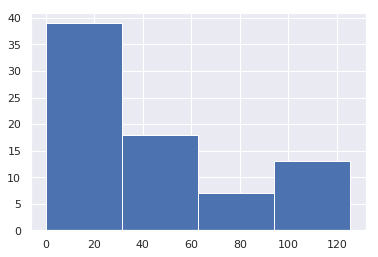

In [50]:
# let's visualize our total likes based on a histogram

import matplotlib.pyplot as plt
Washington_residential_group['Resturent_Likes'].hist(bins=4)
plt.show()

In [51]:
# what are the bins we want to use?

print(np.percentile(Washington_residential_group['Resturent_Likes'], 25))
print(np.percentile(Washington_residential_group['Resturent_Likes'], 50))
print(np.percentile(Washington_residential_group['Resturent_Likes'], 75))

8.0
24.333333333333332
67.4375


In [52]:
# now we have our bin values so let's set them to the appropriate values
# less than 24, 24-45, 45-76, 76>
# poor, below avg, abv avg, great

poor = Washington_residential_group['Resturent_Likes']<=8
below_avg = (Washington_residential_group['Resturent_Likes']>8) & (Washington_residential_group['Resturent_Likes']<=24.33)
abv_avg = (Washington_residential_group['Resturent_Likes']>24.33) & (Washington_residential_group['Resturent_Likes']<=67.44)
great = Washington_residential_group['Resturent_Likes']>67.44

In [53]:

# let's set up a function that will re-categorize our restaurants based on likes

def conditions(s):
    if s['Resturent_Likes']<=8:
        return 'poor'
    if s['Resturent_Likes']<=24.33:
        return 'below avg'
    if s['Resturent_Likes']<=67.44:
        return 'avg avg'
    if s['Resturent_Likes']>67.44:
        return 'great'

merge['total likes_resturent']=merge.apply(conditions, axis=1)

In [54]:
merge

,Neighborhood,Neighborhood Latitude_x,Neighborhood Longitude_x,Popularirt_of_home,Neighborhood Latitude_y,Neighborhood Longitude_y,Resturent_Likes,total likes_resturent
0,Adams Morgan,38.922610,-77.042661,0.935484,38.922610,-77.042661,61.210526,avg avg
1,Berkley,38.912056,-77.088250,1.000000,38.912056,-77.088250,8.000000,poor
2,Bloomingdale,38.916400,-77.011400,0.083333,38.916400,-77.011400,77.142857,great
3,Brentwood,38.918700,-76.990200,4.800000,38.918700,-76.990200,6.750000,poor
4,Brightwood,38.961200,-77.027500,0.750000,38.961200,-77.027500,1.000000,poor
5,Brightwood Park,38.957100,-77.024900,1.000000,38.957100,-77.024900,1.000000,poor
6,Burleith,38.915300,-77.072800,0.333333,38.915300,-77.072800,7.250000,poor
7,Carver Langston,38.900900,-76.977300,3.600000,38.900900,-76.977300,59.000000,avg avg
8,Chinatown,38.899800,-77.021700,2.190476,38.899800,-77.021700,96.785714,great
9,Colony Hill,38.912800,-77.087200,2.000000,38.912800,-77.087200,8.000000,poor


## Data Preparation Part 3:

In [55]:
print(Washington_homes_group['Popularirt_of_home'].max())
print(Washington_homes_group['Popularirt_of_home'].min())
print(Washington_homes_group['Popularirt_of_home'].median())
print(Washington_homes_group['Popularirt_of_home'].mean())

5.538461538461538
0.0
0.8677419354838709
1.189748157557264


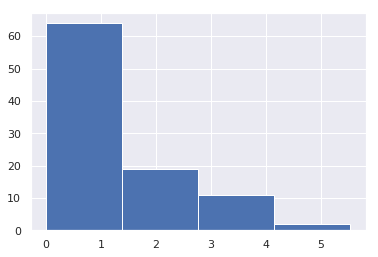

In [71]:
# let's visualize our total likes of resturents based on a histogram

import matplotlib.pyplot as plt
Washington_homes_group['Popularirt_of_home'].hist(bins=4)
plt.show()

In [57]:
# what are the bins we want to use?

print(np.percentile(Washington_homes_group['Popularirt_of_home'], 25))
print(np.percentile(Washington_homes_group['Popularirt_of_home'], 50))
print(np.percentile(Washington_homes_group['Popularirt_of_home'], 75))

0.1607142857142857
0.8677419354838709
2.0


In [58]:
# now we have our bin values so let's set them to the appropriate values
# less than 24, 24-45, 45-76, 76>
# poor, below avg, abv avg, great

poor = Washington_homes_group['Popularirt_of_home']<=0.16
below_avg = (Washington_homes_group['Popularirt_of_home']>0.16) & (Washington_homes_group['Popularirt_of_home']<=0.86)
abv_avg = (Washington_homes_group['Popularirt_of_home']>0.86) & (Washington_homes_group['Popularirt_of_home']<=2)
great = Washington_homes_group['Popularirt_of_home']>2

In [59]:
# let's set up a function that will re-categorize our restaurants based on likes

def conditions(s):
    if s['Popularirt_of_home']<=0.16:
        return 'Unpopular'
    if s['Popularirt_of_home']<=0.86:
        return 'least popular'
    if s['Popularirt_of_home']<=2:
        return 'Somewhat Popular'
    if s['Popularirt_of_home']>2:
        return 'Most Popular'

merge['Popular_home']=merge.apply(conditions, axis=1)

In [60]:
merge

,Neighborhood,Neighborhood Latitude_x,Neighborhood Longitude_x,Popularirt_of_home,Neighborhood Latitude_y,Neighborhood Longitude_y,Resturent_Likes,total likes_resturent,Popular_home
0,Adams Morgan,38.922610,-77.042661,0.935484,38.922610,-77.042661,61.210526,avg avg,Somewhat Popular
1,Berkley,38.912056,-77.088250,1.000000,38.912056,-77.088250,8.000000,poor,Somewhat Popular
2,Bloomingdale,38.916400,-77.011400,0.083333,38.916400,-77.011400,77.142857,great,Unpopular
3,Brentwood,38.918700,-76.990200,4.800000,38.918700,-76.990200,6.750000,poor,Most Popular
4,Brightwood,38.961200,-77.027500,0.750000,38.961200,-77.027500,1.000000,poor,least popular
5,Brightwood Park,38.957100,-77.024900,1.000000,38.957100,-77.024900,1.000000,poor,Somewhat Popular
6,Burleith,38.915300,-77.072800,0.333333,38.915300,-77.072800,7.250000,poor,least popular
7,Carver Langston,38.900900,-76.977300,3.600000,38.900900,-76.977300,59.000000,avg avg,Most Popular
8,Chinatown,38.899800,-77.021700,2.190476,38.899800,-77.021700,96.785714,great,Most Popular
9,Colony Hill,38.912800,-77.087200,2.000000,38.912800,-77.087200,8.000000,poor,Somewhat Popular


## Data Prep Part 4

In [61]:
# one hot encoding
df_onehot = pd.get_dummies(merge[['Popular_home', 'total likes_resturent']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
df_onehot['Name'] = merge['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[fixed_columns]

df_onehot.head()

,Name,Most Popular,Somewhat Popular,Unpopular,least popular,avg avg,below avg,great,poor
0,Adams Morgan,0,1,0,0,1,0,0,0
1,Berkley,0,1,0,0,0,0,0,1
2,Bloomingdale,0,0,1,0,0,0,1,0
3,Brentwood,1,0,0,0,0,0,0,1
4,Brightwood,0,0,0,1,0,0,0,1


## Clustering Part 1

In [62]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
cluster_df = df_onehot.drop('Name', axis=1)

k_clusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=k_clusters, random_state=0).fit(cluster_df)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 3, 1, 2, 0, 2, 1, 3, 0], dtype=int32)

## Clustering Part 2

In [63]:
merge['label'] = kmeans.labels_
merge.head()

,Neighborhood,Neighborhood Latitude_x,Neighborhood Longitude_x,Popularirt_of_home,Neighborhood Latitude_y,Neighborhood Longitude_y,Resturent_Likes,total likes_resturent,Popular_home,label
0,Adams Morgan,38.922610,-77.042661,0.935484,38.922610,-77.042661,61.210526,avg avg,Somewhat Popular,0
1,Berkley,38.912056,-77.088250,1.000000,38.912056,-77.088250,8.000000,poor,Somewhat Popular,0
2,Bloomingdale,38.916400,-77.011400,0.083333,38.916400,-77.011400,77.142857,great,Unpopular,3
3,Brentwood,38.918700,-76.990200,4.800000,38.918700,-76.990200,6.750000,poor,Most Popular,1
4,Brightwood,38.961200,-77.027500,0.750000,38.961200,-77.027500,1.000000,poor,least popular,2


## Clustering Part 3

In [66]:
map_clusters = folium.Map(location=[Washington_latitude, Washington_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i+x+(i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merge['Neighborhood Latitude_x'], merge['Neighborhood Longitude_x'], merge['Neighborhood'], merge['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=2,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.3).add_to(map_clusters)
       
map_clusters

,Neighborhood,Neighborhood Latitude_x,Neighborhood Longitude_x,Popularirt_of_home,Neighborhood Latitude_y,Neighborhood Longitude_y,Resturent_Likes,total likes_resturent,Popular_home,label
0,Adams Morgan,38.922610,-77.042661,0.935484,38.922610,-77.042661,61.210526,avg avg,Somewhat Popular,0
1,Berkley,38.912056,-77.088250,1.000000,38.912056,-77.088250,8.000000,poor,Somewhat Popular,0
5,Brightwood Park,38.957100,-77.024900,1.000000,38.957100,-77.024900,1.000000,poor,Somewhat Popular,0
9,Colony Hill,38.912800,-77.087200,2.000000,38.912800,-77.087200,8.000000,poor,Somewhat Popular,0
12,Dupont Circle,38.909620,-77.043410,1.360000,38.909620,-77.043410,50.580645,avg avg,Somewhat Popular,0
19,Glover Park,38.922500,-77.074722,1.000000,38.922500,-77.074722,4.500000,poor,Somewhat Popular,0
23,Kalorama,38.918400,-77.048000,1.157895,38.918400,-77.048000,58.850000,avg avg,Somewhat Popular,0
25,Langdon,38.922800,-76.973900,1.000000,38.922800,-76.973900,7.000000,poor,Somewhat Popular,0
27,Logan Circle,38.909720,-77.030280,1.125000,38.909720,-77.030280,81.194444,great,Somewhat Popular,0
30,Mount Pleasant,38.928694,-77.037333,1.176471,38.928694,-77.037333,32.733333,avg avg,Somewhat Popular,0


## Cluster 1:

#### . Somewhat Popular homes
#### . Mostly poor or average restaurant


In [70]:
merge.loc[merge['label']==0]

,Neighborhood,Neighborhood Latitude_x,Neighborhood Longitude_x,Popularirt_of_home,Neighborhood Latitude_y,Neighborhood Longitude_y,Resturent_Likes,total likes_resturent,Popular_home,label
0,Adams Morgan,38.922610,-77.042661,0.935484,38.922610,-77.042661,61.210526,avg avg,Somewhat Popular,0
1,Berkley,38.912056,-77.088250,1.000000,38.912056,-77.088250,8.000000,poor,Somewhat Popular,0
5,Brightwood Park,38.957100,-77.024900,1.000000,38.957100,-77.024900,1.000000,poor,Somewhat Popular,0
9,Colony Hill,38.912800,-77.087200,2.000000,38.912800,-77.087200,8.000000,poor,Somewhat Popular,0
12,Dupont Circle,38.909620,-77.043410,1.360000,38.909620,-77.043410,49.000000,avg avg,Somewhat Popular,0
19,Glover Park,38.922500,-77.074722,1.000000,38.922500,-77.074722,4.500000,poor,Somewhat Popular,0
23,Kalorama,38.918400,-77.048000,1.157895,38.918400,-77.048000,58.850000,avg avg,Somewhat Popular,0
25,Langdon,38.922800,-76.973900,1.000000,38.922800,-76.973900,7.000000,poor,Somewhat Popular,0
27,Logan Circle,38.909720,-77.030280,1.125000,38.909720,-77.030280,79.027027,great,Somewhat Popular,0
30,Mount Pleasant,38.928694,-77.037333,1.176471,38.928694,-77.037333,32.733333,avg avg,Somewhat Popular,0


## Cluster 2

#### . Most Popular Home
#### . Great and above avg. resturents 

In [67]:
merge.loc[merge['label']==1]

,Neighborhood,Neighborhood Latitude_x,Neighborhood Longitude_x,Popularirt_of_home,Neighborhood Latitude_y,Neighborhood Longitude_y,Resturent_Likes,total likes_resturent,Popular_home,label
3,Brentwood,38.918700,-76.990200,4.800000,38.918700,-76.990200,6.750000,poor,Most Popular,1
7,Carver Langston,38.900900,-76.977300,3.600000,38.900900,-76.977300,59.000000,avg avg,Most Popular,1
10,Columbia Heights,38.925000,-77.030000,2.444444,38.925000,-77.030000,67.437500,avg avg,Most Popular,1
13,Eckington,38.915300,-77.001700,0.666667,38.915300,-77.001700,45.750000,avg avg,least popular,1
16,Foggy Bottom,38.900889,-77.050056,2.791667,38.900889,-77.050056,53.000000,avg avg,Most Popular,1
18,Georgetown,38.909440,-77.065000,0.000000,38.909440,-77.065000,40.470588,avg avg,Unpopular,1
20,Howard University,38.922220,-77.019440,0.000000,38.922220,-77.019440,61.571429,avg avg,Unpopular,1
21,Ivy City,38.909900,-76.991700,0.000000,38.909900,-76.991700,48.400000,avg avg,Unpopular,1
24,Kingman Park,38.895400,-76.977200,0.500000,38.895400,-76.977200,59.000000,avg avg,least popular,1
29,McLean Gardens,38.937200,-77.075000,3.000000,38.937200,-77.075000,20.625000,below avg,Most Popular,1


## Cluster 3:

### . Least Popular homes
### . Poor and below avg. resturents

In [68]:
merge.loc[merge['label']==2]

,Neighborhood,Neighborhood Latitude_x,Neighborhood Longitude_x,Popularirt_of_home,Neighborhood Latitude_y,Neighborhood Longitude_y,Resturent_Likes,total likes_resturent,Popular_home,label
4,Brightwood,38.961200,-77.027500,0.750000,38.961200,-77.027500,1.000000,poor,least popular,2
6,Burleith,38.915300,-77.072800,0.333333,38.915300,-77.072800,7.250000,poor,least popular,2
14,Edgewood,38.922600,-77.000500,0.500000,38.922600,-77.000500,9.000000,below avg,least popular,2
15,Fairlawn,38.870830,-76.978890,0.500000,38.870830,-76.978890,0.000000,poor,least popular,2
17,Friendship Heights,38.957000,-77.083778,0.800000,38.957000,-77.083778,17.000000,below avg,least popular,2
26,LeDroit Park,38.919052,-77.017035,0.500000,38.919052,-77.017035,120.500000,great,least popular,2
28,Massachusetts Heights,38.927200,-77.069200,0.800000,38.927200,-77.069200,19.571429,below avg,least popular,2
36,North Michigan Park,38.945400,-76.996000,0.000000,38.945400,-76.996000,7.000000,poor,Unpopular,2
40,Petworth,38.942161,-77.025525,0.666667,38.942161,-77.025525,4.000000,poor,least popular,2
50,Takoma,38.975000,-77.020280,0.500000,38.975000,-77.020280,0.500000,poor,least popular,2


## Cluster 4:

### . Unpopular home
### . Average food resturent

In [69]:
merge.loc[merge['label']==3]

,Neighborhood,Neighborhood Latitude_x,Neighborhood Longitude_x,Popularirt_of_home,Neighborhood Latitude_y,Neighborhood Longitude_y,Resturent_Likes,total likes_resturent,Popular_home,label
2,Bloomingdale,38.916400,-77.011400,0.083333,38.916400,-77.011400,77.142857,great,Unpopular,3
8,Chinatown,38.899800,-77.021700,2.190476,38.899800,-77.021700,96.785714,great,Most Popular,3
11,Downtown,38.902500,-77.032861,2.857143,38.902500,-77.032861,98.852941,great,Most Popular,3
22,Judiciary Square,38.895280,-77.018472,2.285714,38.895280,-77.018472,85.956522,great,Most Popular,3
32,Mount Vernon Triangle,38.902500,-77.017780,2.500000,38.902500,-77.017780,112.703704,great,Most Popular,3
34,Near Northeast,38.901300,-77.003200,3.750000,38.901300,-77.003200,125.571429,great,Most Popular,3
41,Pleasant Hill,38.919800,-77.020000,2.444444,38.919800,-77.020000,121.500000,great,Most Popular,3
43,Shaw,38.911139,-77.021917,2.125000,38.911139,-77.021917,95.952381,great,Most Popular,3
46,Southwest Waterfront,38.881200,-77.016400,3.000000,38.881200,-77.016400,118.866667,great,Most Popular,3
48,Sursum Corda,38.905300,-77.011200,3.555556,38.905300,-77.011200,115.600000,great,Most Popular,3
